In [2]:
import sklearn.datasets
print(dir(sklearn.datasets))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_arff_parser', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_f

In [63]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [8]:
house = fetch_california_housing()
print(house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [9]:
df = pd.DataFrame(house.data, columns=house.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
house.target_names

['MedHouseVal']

In [23]:
df["MedHouseVal"] = house.target
df=df.sample(frac=1).reset_index(drop=True).head(1000)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,10.7097,52.0,7.004808,1.033654,495.0,2.379808,37.79,-122.45,5.00001
1,4.4219,34.0,5.850220,1.074890,795.0,3.502203,34.40,-118.98,3.38100
2,4.4529,10.0,6.006167,1.046696,4163.0,3.667841,38.15,-122.24,1.44100
3,6.6288,7.0,6.802554,1.026277,15037.0,3.692780,34.04,-117.87,3.39700
4,3.2258,10.0,5.604651,1.112175,2082.0,2.848153,33.60,-117.36,1.59300


In [14]:
dtr=DecisionTreeRegressor(random_state=42)

In [24]:
X=df.drop("MedHouseVal",axis=True)
y=df["MedHouseVal"]

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 8), (200, 8), (800,), (200,))

**Model Fitting without cross validation and prouning**

In [34]:
model=dtr.fit(x_train,y_train)

y_pred_train=dtr.predict(x_train)
y_pred_test=dtr.predict(x_test)

print(f"Train MSE : {mean_squared_error(y_train,y_pred_train):.2f}")
print("Train R2 :",r2_score(y_train,y_pred_train))

print("Test MSE :",mean_squared_error(y_test,y_pred_test))
print("Test R2 :",r2_score(y_test,y_pred_test))

Train MSE : 0.00
Train R2 : 1.0
Test MSE : 0.705210515503
Test R2 : 0.3679307830352273


In [42]:
print("Tree Depth:", dtr.tree_.max_depth)
print("Number of Nodes:", dtr.tree_.node_count)

Tree Depth: 21
Number of Nodes: 1535


**Cost Complexity Pruning**

In [43]:
path = dtr.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

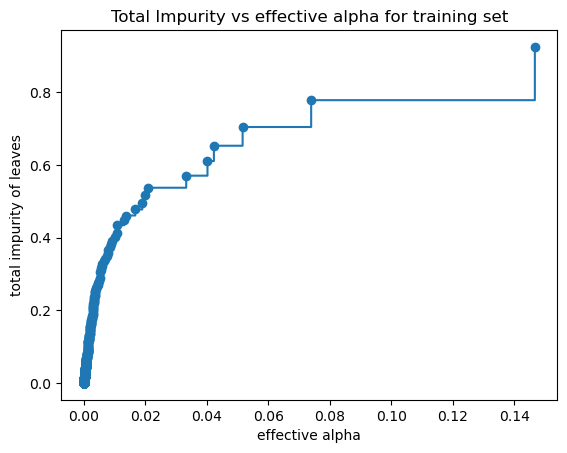

In [44]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

This plot visually represents the pruning path calculation itself.


This is the training data view. As you increase $\alpha$, you are forcing the tree to accept a higher total impurity (more error) in exchange for being simpler (fewer nodes). The final point is the trivial tree with maximum impurity.

In [47]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.4163333194620109


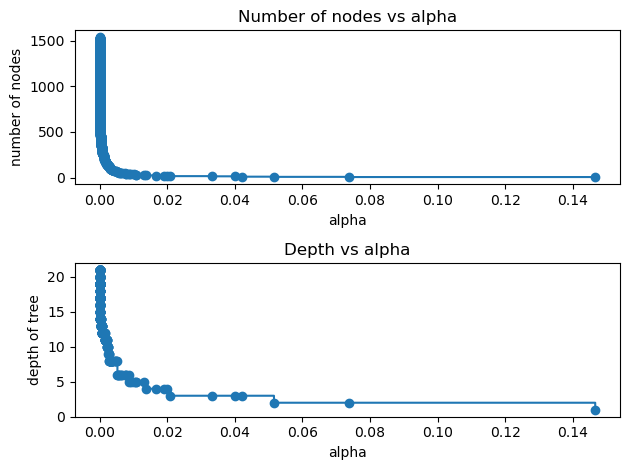

In [48]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

These plots show how the size and complexity of the tree change as you increase the pruning parameter $\alpha$.
Number of Nodes: Starts very high ($\approx 1500$) at $\alpha \approx 0$ and plummets as $\alpha$ increases.
Depth of Tree: Starts high (around $\mathbf{20}$) at $\alpha \approx 0$ and rapidly decreases.

This confirms that increasing $\alpha$ successfully prunes the tree, drastically reducing its complexity (fewer nodes, shallower depth). The unpruned tree was extremely large ($\approx 1500$ nodes), explaining the initial overfitting.

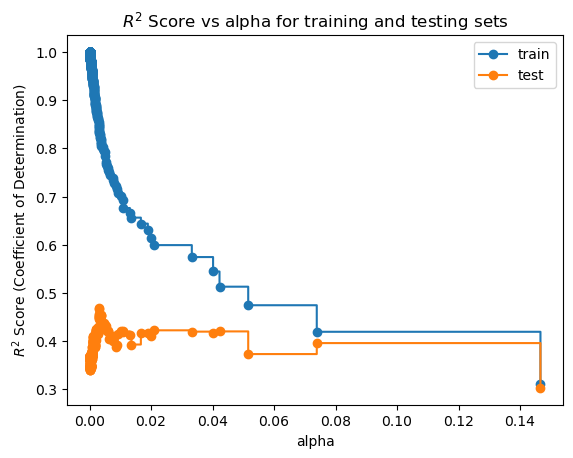

In [51]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("$R^2$ Score (Coefficient of Determination)")
ax.set_title("$R^2$ Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

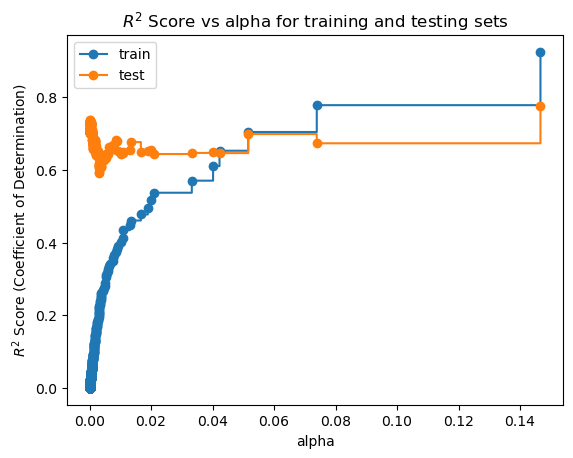

In [75]:
train_scores = [mean_squared_error(y_train, clf.predict(x_train)) for clf in clfs]
test_scores = [mean_squared_error(y_test, clf.predict(x_test)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("$R^2$ Score (Coefficient of Determination)")
ax.set_title("$R^2$ Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

This is the most important plot for determining the optimal $\alpha$.
Train Score: The training $R^2$ starts near 1.0 (perfect fit) when $\alpha \approx 0$ (unpruned tree) and gradually decreases as $\alpha$ increases (the tree gets simpler).
Test Score: The test $R^2$ starts lower (around 0.35), rises to its peak, and then drops off again.
Choosing $\alpha$: The $\alpha$ value corresponding to the highest point of the orange line is the optimal $\alpha$ for your final model.


Conclusion: The optimal $\alpha$ is where the orange line reaches its peak, which appears to be around $\alpha \approx 0.015$ or $\alpha \approx 0.02$, achieving an $R^2$ score of roughly 0.42.

In [69]:
alpha_range = np.linspace(start=0.005, stop=0.030, num=150)


clf_decision=GridSearchCV(dtr,{
    'ccp_alpha': alpha_range
}, cv=KFold(n_splits=5, shuffle=True, random_state=42))
clf_decision.fit(x_train,y_train)
clf_decision.cv_results_

{'mean_fit_time': array([0.01128283, 0.01556673, 0.01128421, 0.00956883, 0.00780191,
        0.00890589, 0.00870442, 0.00786476, 0.00759816, 0.008641  ,
        0.00856838, 0.00953498, 0.00712013, 0.00745745, 0.00690217,
        0.00742607, 0.00687509, 0.00710287, 0.00773768, 0.00789123,
        0.00716319, 0.00745535, 0.00719037, 0.00721846, 0.00646296,
        0.0066967 , 0.00719643, 0.00737638, 0.00700755, 0.00713463,
        0.00886536, 0.00720468, 0.00708694, 0.00693045, 0.00671926,
        0.00753937, 0.00692277, 0.00680289, 0.00722637, 0.00710869,
        0.00712934, 0.00731311, 0.00764675, 0.00760517, 0.00769897,
        0.00781522, 0.00740356, 0.00736518, 0.00719795, 0.00687623,
        0.00820036, 0.00914459, 0.00717483, 0.00731182, 0.00685821,
        0.00697408, 0.00681567, 0.00803494, 0.00733104, 0.00682926,
        0.00672441, 0.00680456, 0.0073123 , 0.00709939, 0.00730166,
        0.00673947, 0.00699987, 0.00730052, 0.00719995, 0.00724154,
        0.00719194, 0.00650029,

In [70]:
df_decision=pd.DataFrame(clf_decision.cv_results_)
df_decision.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011283,0.001196,0.002671,0.001126,0.005000,{'ccp_alpha': 0.005},0.521038,0.453525,0.555248,0.615774,0.502290,0.529575,0.054204,13
1,0.015567,0.002912,0.003452,0.001456,0.005168,{'ccp_alpha': 0.0051677852348993285},0.520177,0.476083,0.555248,0.603651,0.505023,0.532036,0.043974,11
2,0.011284,0.002345,0.003370,0.001346,0.005336,{'ccp_alpha': 0.005335570469798658},0.557446,0.476083,0.551771,0.600215,0.505023,0.538107,0.043266,8
3,0.009569,0.002023,0.002038,0.000897,0.005503,{'ccp_alpha': 0.005503355704697986},0.557446,0.470933,0.556829,0.591984,0.497274,0.534893,0.044171,9
4,0.007802,0.000461,0.001507,0.000448,0.005671,{'ccp_alpha': 0.005671140939597316},0.558569,0.498150,0.555009,0.591984,0.492778,0.539298,0.038082,4


In [71]:
clf_decision.best_params_

{'ccp_alpha': 0.005838926174496644}

In [72]:
model=DecisionTreeRegressor(ccp_alpha=0.005838926174496644,random_state=42).fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

print("Train R2 score: ", model.score(x_train,y_train))
print("Test R2 score: ", model.score(x_test,y_test))

Train R2 score:  0.7637624132432339
Test R2 score:  0.42154037522885124


In [73]:
print("Train MSE: ", mean_squared_error(y_train, y_pred_train))
print("Test MSE: ", mean_squared_error(y_test, y_pred_test))

Train MSE:  0.31694581565862134
Test MSE:  0.6453973698346859


In [74]:
my_dict={
    'Train R2 score': [1.0, 0.7638], 'Test R2 score': [0.3679, 0.4215], 
    'Train MSE': [0.00, 0.3169], 'Test MSE': [0.7052, 0.6454]
}

final_table=pd.DataFrame(my_dict, index=["Unprouned Fully Grown Tree","Final Prouned Tree"])
print(final_table)

                            Train R2 score  Test R2 score  Train MSE  Test MSE
Unprouned Fully Grown Tree          1.0000         0.3679     0.0000    0.7052
Final Prouned Tree                  0.7638         0.4215     0.3169    0.6454
